Sources:
    
http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/

http://scikit-learn.org/stable/modules/tree.html

https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176

http://scikit-learn.org/stable/modules/neighbors.html

http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

# Decision Trees 

Today we will try to predict a student's GPA using Decision Trees and K Nearest Neighbors Algorithms. 

Tutorial plan:

[1. Data Preprocessing](#1.-Data-Preprocessing)

[2. Decision Trees (Classification)](#2.-Decision-Trees)


Things to keep in mind:

**Decision Trees**

* Decision trees are used for **classification** - that is, they sort input into separate buckets (assign the input to categorical variables). Today, we will use decision trees to predict one of 13 possible GPA values (values from 1.0 to 4.0 which lie 0.25 apart). We will treat these GPA values as completely distinct values, ignoring that they are consecutive, because that is what decision trees require.


* We will use three input variables for decision trees. These input variables (or **predictors**) do not need to be discrete.

### Let's start by loading in our data, looking at it and reshaping it to the form that's necessary for our algorithm.

In [1]:
# import libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys, os
from sklearn.metrics import accuracy_score
import sys
# ff is a library written by the Fragile Families team and stored in a file ff.py a level up from our directory. 
# To import it, we need to append the directory above ours ('..') to our path and import the ff package (file ff.py)
sys.path.append('..')
import ff

### Set input variables

In [2]:
# directory with output data
background = "../../ai4all_data/background.csv"
train = "../../ai4all_data/train.csv"
output_dir = "../output"

# if the output directory hasn't been created, Python will complain, so let's create it if it doesn't exist yet.
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 1. Data Preprocessing.

### Read in data

In [3]:
data_frame = pd.read_csv(background, low_memory=False)
# display the dimensions and first five rows of our data frame
print(data_frame.shape)
data_frame.head()

(4242, 12943)


,challengeID,m1intmon,m1intyr,m1lenhr,m1lenmin,cm1twoc,cm1fint,cm1tdiff,cm1natsm,m1natwt,...,m4d9,m4e23,f4d6,f4d7,f4d9,m5c6,m5d20,m5k10,f5c6,k5f1
0,1,-3,NaN,-3,40,NaN,0,NaN,NaN,NaN,...,-3.0,-3.000000,-3.000000,-3.000000,-3.0,-3.000000,-3.000000,-3,-3.000000,-3.000000
1,2,-3,NaN,0,40,NaN,1,NaN,NaN,NaN,...,-3.0,8.473318,-3.000000,-3.000000,-3.0,-3.000000,9.845074,-3,-3.000000,9.723551
2,3,-3,NaN,0,35,NaN,1,NaN,NaN,NaN,...,-3.0,-3.000000,9.097495,10.071504,-3.0,-3.000000,-3.000000,-3,-3.000000,-3.000000
3,4,-3,NaN,0,30,NaN,1,NaN,NaN,NaN,...,-3.0,-3.000000,9.512706,10.286578,-3.0,10.677285,-3.000000,-3,8.522331,10.608137
4,5,-3,NaN,0,25,NaN,1,NaN,NaN,NaN,...,-3.0,-3.000000,11.076016,9.615958,-3.0,9.731979,-3.000000,-3,10.115313,9.646466


In [4]:
num_samples = data_frame.shape[0]

# "assert" will throw an error if the condition is not fulfilled. This checks whether the challengeID frame is 
# a set of consecutive numbers from 1 to number of samples+1
assert list(data_frame['challengeID'].to_dict().values()) == list(range(1, num_samples+1))

# move from the original index (starting from 0) to the challengeID index
data_frame = data_frame.set_index('challengeID')

data_frame.head()

,m1intmon,m1intyr,m1lenhr,m1lenmin,cm1twoc,cm1fint,cm1tdiff,cm1natsm,m1natwt,cm1natsmx,...,m4d9,m4e23,f4d6,f4d7,f4d9,m5c6,m5d20,m5k10,f5c6,k5f1
challengeID,,,,,,,,,,,,,,,,,,,,,
1,-3,NaN,-3,40,NaN,0,NaN,NaN,NaN,NaN,...,-3.0,-3.000000,-3.000000,-3.000000,-3.0,-3.000000,-3.000000,-3,-3.000000,-3.000000
2,-3,NaN,0,40,NaN,1,NaN,NaN,NaN,NaN,...,-3.0,8.473318,-3.000000,-3.000000,-3.0,-3.000000,9.845074,-3,-3.000000,9.723551
3,-3,NaN,0,35,NaN,1,NaN,NaN,NaN,NaN,...,-3.0,-3.000000,9.097495,10.071504,-3.0,-3.000000,-3.000000,-3,-3.000000,-3.000000
4,-3,NaN,0,30,NaN,1,NaN,NaN,NaN,NaN,...,-3.0,-3.000000,9.512706,10.286578,-3.0,10.677285,-3.000000,-3,8.522331,10.608137
5,-3,NaN,0,25,NaN,1,NaN,NaN,NaN,NaN,...,-3.0,-3.000000,11.076016,9.615958,-3.0,9.731979,-3.000000,-3,10.115313,9.646466


Observe that now the challengeID is the index. Also, see that many of the variables have NaN values.

In [5]:
#removing all non-numeric elements
data_frame = data_frame.select_dtypes(include = [np.number])

Now, let's read in the outcomes

In [6]:
# read in the 6 outcome variables
outcome = pd.read_csv(train, low_memory=False)
outcome.head()

,challengeID,gpa,grit,materialHardship,eviction,layoff,jobTraining
0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,3,NaN,NaN,NaN,NaN,NaN,NaN
2,6,NaN,3.50,0.090909,0.0,0.0,0.0
3,7,2.5,3.25,0.000000,0.0,0.0,0.0
4,8,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# again, set the challengeID as the index
outcome = outcome.set_index('challengeID')
print(outcome.shape[0])
# remove the rows where GPA is a NaN
outcome = outcome.loc[~outcome['gpa'].isnull()]
# We see that 956/2121 rows were removed
print(outcome.shape[0])

2121
1165


In [8]:
outcome.head()

,gpa,grit,materialHardship,eviction,layoff,jobTraining
challengeID,,,,,,
7,2.50,3.25,0.000000,0.0,0.0,0.0
9,2.25,4.00,0.181818,0.0,0.0,0.0
10,3.25,3.25,0.090909,0.0,NaN,0.0
13,2.75,4.00,0.181818,0.0,0.0,1.0
14,3.25,2.75,0.272727,0.0,1.0,0.0


Observe that the challengeID reflects which rows remain in the outcome DataFrame after NaN removal.

In [9]:
# Now, look at the different values of GPA that occur in the table. You can also look at their frequency:
print(outcome.gpa.unique())
print(outcome.gpa.value_counts(dropna=False))

[ 2.5   2.25  3.25  2.75  2.    3.    3.5   4.    3.75  1.25  1.5   1.75
  1.  ]
3.25    170
3.00    157
2.75    147
2.50    134
3.50    128
2.25    114
4.00     78
3.75     73
2.00     62
1.75     56
1.50     34
1.25      7
1.00      5
Name: gpa, dtype: int64


We are interested in predicting GPA. Look at the variables in the data set and write out 5 ideas of the variables you'd expect to be correlated with GPA:

Let's start by studying three variables:
* t5c13a: literacy skills
* t5c13b: social science skills
* t5c13c: math skills

It intuitively makes sense they would be correlated with GPA (it's a little bit of a cheat: other people have already found it for us!).
    
Let's look at the values they contain:

In [10]:
# Let's have a closer look at the data. We have three predictor variables: t5c13a, t5c13b and t5c13c.
print(data_frame.t5c13a.unique())
print(data_frame.t5c13b.unique())
print(data_frame.t5c13c.unique())

# We observe that there are no NaN values, which is great, we won't need to remove them.
# However, if you look at the documentation, you can see that all the negative values actually are different types
# of missingness:
print(ff.select('t5c13a'))

[-9  3  1  4  2 -1  5 -2 -3]
[-9  3  2  4  1 -1  5 -2 -3]
[-9  2  4  3  1 -1  5 -2 -3]
{'label': "C13A. Child's language and literacy skills", 'scope': '20', 'respondent': 't', 'group_subid': None, 'name': 't5c13a', 'leaf': '13a', 'group_id': '3026', 'data_source': 'questionnaire', 'topics': [{'topic': 'cognitive skills', 'umbrella': 'Cognitive and behavioral development'}], 'id': 12655, 'data_type': 'oc', 'section': 'c', 'warning': 0, 'responses': {'-4': 'Multiple ans', '-6': 'Skip', '5': 'far above average', '3': 'average', '-5': 'Not asked', '-2': "Don't know", '-9': 'Not in wave', '2': 'below average', '4': 'above average', '-1': 'Refuse', '1': 'far below average', '-3': 'Missing', '-8': 'Out of range', '-7': 'N/A'}, 'old_name': 't5c13a', 'wave': '5'}


In [11]:
# To see how often a given value occurs, we can use the "value_counts" function
print(data_frame.t5c13a.value_counts())

-9    2228
 3     728
 2     531
 4     441
 1     193
 5     107
-2       7
-1       6
-3       1
Name: t5c13a, dtype: int64


We will only keep the students who 

    1) have the GPA variable (select the only the students in data_frame that haven't been removed from outcome)

    2) do not have missing values for any of the three categories we're interested in: language and literacy skills ('t5c13a'), social science skills ('t5c13b'), math skills ('t5c13c')

And remove the other ones

In [12]:
# Choose only those students (rows of data_frame) whose GPA value is not missing
rows_remaining_outcome = outcome.index.values
rows_to_keep_dataframe = data_frame.index.isin(rows_remaining_outcome)
data_frame = data_frame.loc[rows_to_keep_dataframe]

# subselect the three columns we are interested in
skills_columns = data_frame[['t5c13a', 't5c13b', 't5c13c']]
skills_columns.head()

,t5c13a,t5c13b,t5c13c
challengeID,,,
7,-9,-9,-9
9,1,2,2
10,-9,-9,-9
13,-9,-9,-9
14,3,4,4


In [13]:
# Pick out students whose skills are non-missing (above 0 values)
X = skills_columns[(skills_columns>0).all(1)]
# The .all(1) function says "apply the >0 condition only if all columns (all elements across dimension 1) fulfull it.
# This guarantees that only the rows where all skills have non-missing values will be selected.

In [14]:
X.head()

,t5c13a,t5c13b,t5c13c
challengeID,,,
9,1,2,2
14,3,4,4
16,1,2,2
18,2,2,2
23,2,4,3


In [15]:
# At this point, you may want to save the data frame you just created. You can do it by calling
# my_path = "insert_your_path_X" # edit this
# X.to_csv(my_path)

Now that we have removed the aditional rows with missing values from the predictor table (X), we need to do the same to the output table.

Pick out the GPA outcomes for students remaining in the table.


In [16]:
Y = outcome.loc[outcome.index.isin(X.index.values)]

In [17]:
Y.head()

,gpa,grit,materialHardship,eviction,layoff,jobTraining
challengeID,,,,,,
9,2.25,4.00,0.181818,0.0,0.0,0.0
14,3.25,2.75,0.272727,0.0,1.0,0.0
16,2.00,3.50,0.090909,0.0,0.0,1.0
18,2.25,3.00,0.000000,0.0,1.0,0.0
23,2.50,3.25,0.000000,0.0,0.0,0.0


In [18]:
# Ensure that X, Y have the same number of rows:
print(X.shape)
print(Y.shape)

(734, 3)
(734, 6)


In [19]:
# At this point, you may want to save the data frame you just created. You can do it by calling
# my_path = "insert_your_path_Y" # edit this
# Y.to_csv(my_path)

In [20]:
# Let's again have a closer look at the data. We have three predictor variables: t5c13a, t5c13b and t5c13c.
print(X.t5c13a.value_counts())
print(X.t5c13b.value_counts())
print(X.t5c13c.value_counts())
print(Y.gpa.value_counts())

3    281
2    174
4    165
1     76
5     38
Name: t5c13a, dtype: int64
3    397
4    141
2    127
1     48
5     21
Name: t5c13b, dtype: int64
3    314
4    168
2    159
1     64
5     29
Name: t5c13c, dtype: int64
3.25    104
3.00     96
2.75     95
2.50     82
3.50     81
2.25     73
4.00     54
3.75     51
2.00     36
1.75     30
1.50     23
1.25      5
1.00      4
Name: gpa, dtype: int64


In [21]:
print(len(Y.gpa.unique()))

13


We see that all three columns contain 5 unique categories. 

The GPA is also put into 13 unique categories (although it could be a continuous variable, in this case it's been collected as a discrete variable). 

Decision trees need discrete outcomes (since they are used for classification, not regression). We need to change their data type from Float to String (this will treat them as labels, not numbers)

In [22]:
GPA = Y.gpa.astype('str')

# 2. Decision Trees

In [23]:
# First, let's split our data into train and test sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, GPA, test_size = 0.3, random_state = 100)

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
y_pred = clf.predict(X_test).astype(float)

### Draw the tree graph

In [26]:
# Functions for plotting trees

from sklearn.tree import export_graphviz
import graphviz
def show_tree(treeGraph, out_file, features=None, classes=None):
    export_graphviz(clf_changed, out_file, feature_names=features, class_names=classes, filled=True)
    with open(out_file) as f:
        dot_graph = f.read()
    graph = graphviz.Source(dot_graph)
    return graph

from sklearn import tree
import pydotplus
from IPython.display import Image
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF, renderPM
def save_tree(treeGraph, out_file, features=None, classes=None):
    dot_data = tree.export_graphviz(treeGraph, out_file=None, feature_names=features, class_names=classes, filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_svg("tree.svg")
    # convert svg to png
    drawing = svg2rlg("tree.svg")
    renderPM.drawToFile(drawing, out_file)

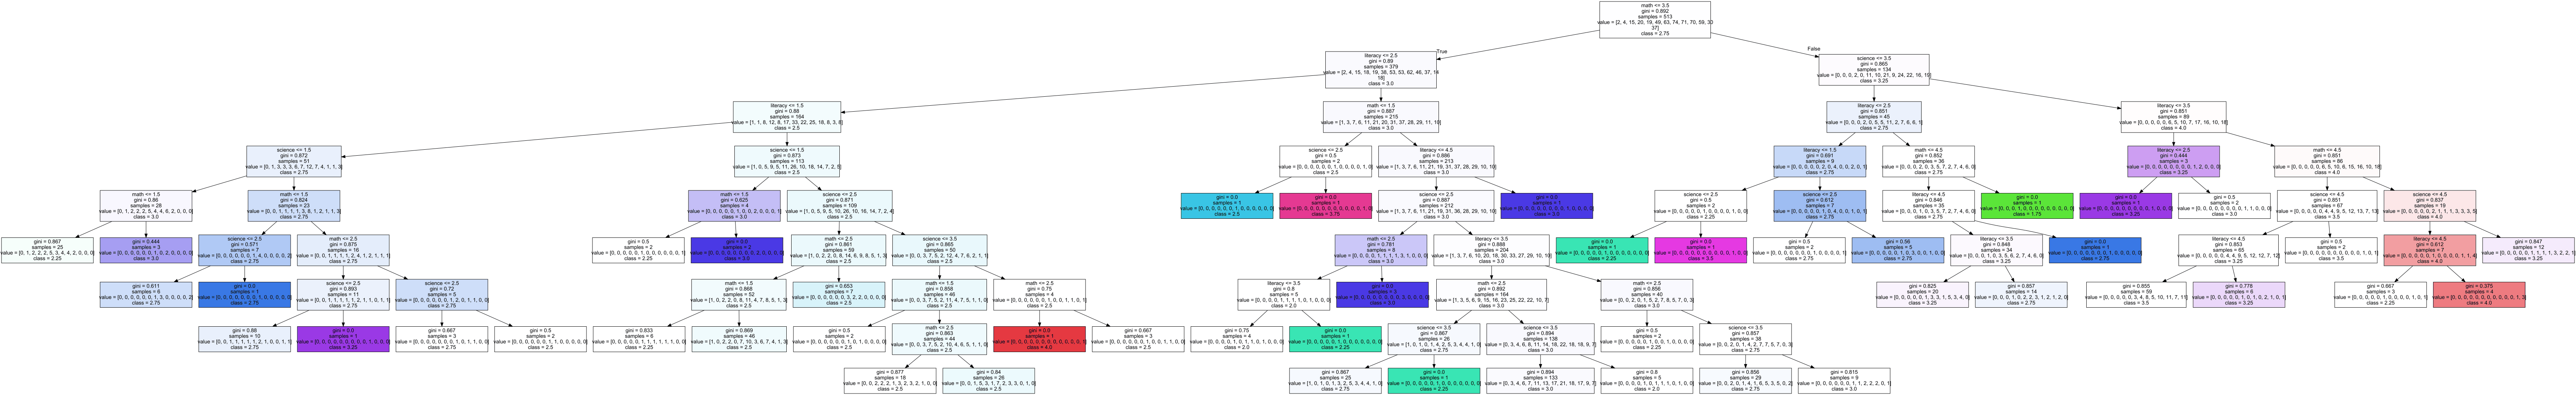

In [27]:
# Save and display generated tree 
our_features = ['literacy','science','math']
our_classes = ['1.0', '1.25', '1.5', '1.75', '2.0', '2.25', '2.5', '2.75', '3.0','3.25', '3.5', '3.75', '4.0']
our_filename = "mytree.png"
save_tree(clf, out_file = our_filename, features = our_features, classes = our_classes)
i = Image(filename = our_filename)
i

### Interpreting the generated trees
Each intermediate node (box) of the tree contains four values:

1) Rule that's followed for "child" nodes, such as "science <= 2.5".

2) The gini coefficient

3) The number of samples from each category in the training set that fell into this node

4) The class assigned at this intermediate point

The final nodes (leaves) contain the last three values.

### Exercise
Look at the generated tree. Find the leaves with label 4.0. What rules did the algorithm follow to classify students as having a 4.0 GPA? Do these rules make sense? Why?

Now do the same with a 2.0 GPA. Are the rules generated to make those predictions more/less logical? Why?

### Now, let's evaluate the accuracy of our predictions

In [28]:
# What is the accuracy on the training set? 
train_pred = clf.predict(X_train)
train_acc = sum(train_pred==y_train.values)/train_pred.shape[0]
print("Training accuracy is", train_acc)

# What is the accuracy on the test set? 
test_pred = clf.predict(X_test)
test_acc = sum(test_pred==y_test.values)/test_pred.shape[0]
print("Training accuracy is", test_acc)

Training accuracy is 0.253411306043
Training accuracy is 0.131221719457


### Find mean squared error of prediction

In [31]:
sum(test_pred==y_test.values)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test_pred, y_test.values))

0.71208857296449179

### Changing parameters
We only used the default values in the tree. Let's see again what things we can modify when calling the tree method.

In [32]:
DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Among the simplest things, we can edit the depth of the tree, the maximum number of leaf nodes, minimum number of leaves fer leaf. 

1. Think about how changing each of the three elements can change the accuracy or the way data is used.

2. Try editing those variables and see if you can increase the accuracy. 

max_depth 5
max_leaf_nodes 10
min_samples_leaf 1
Training accuracy is 0.216374269006
Training accuracy is 0.10407239819


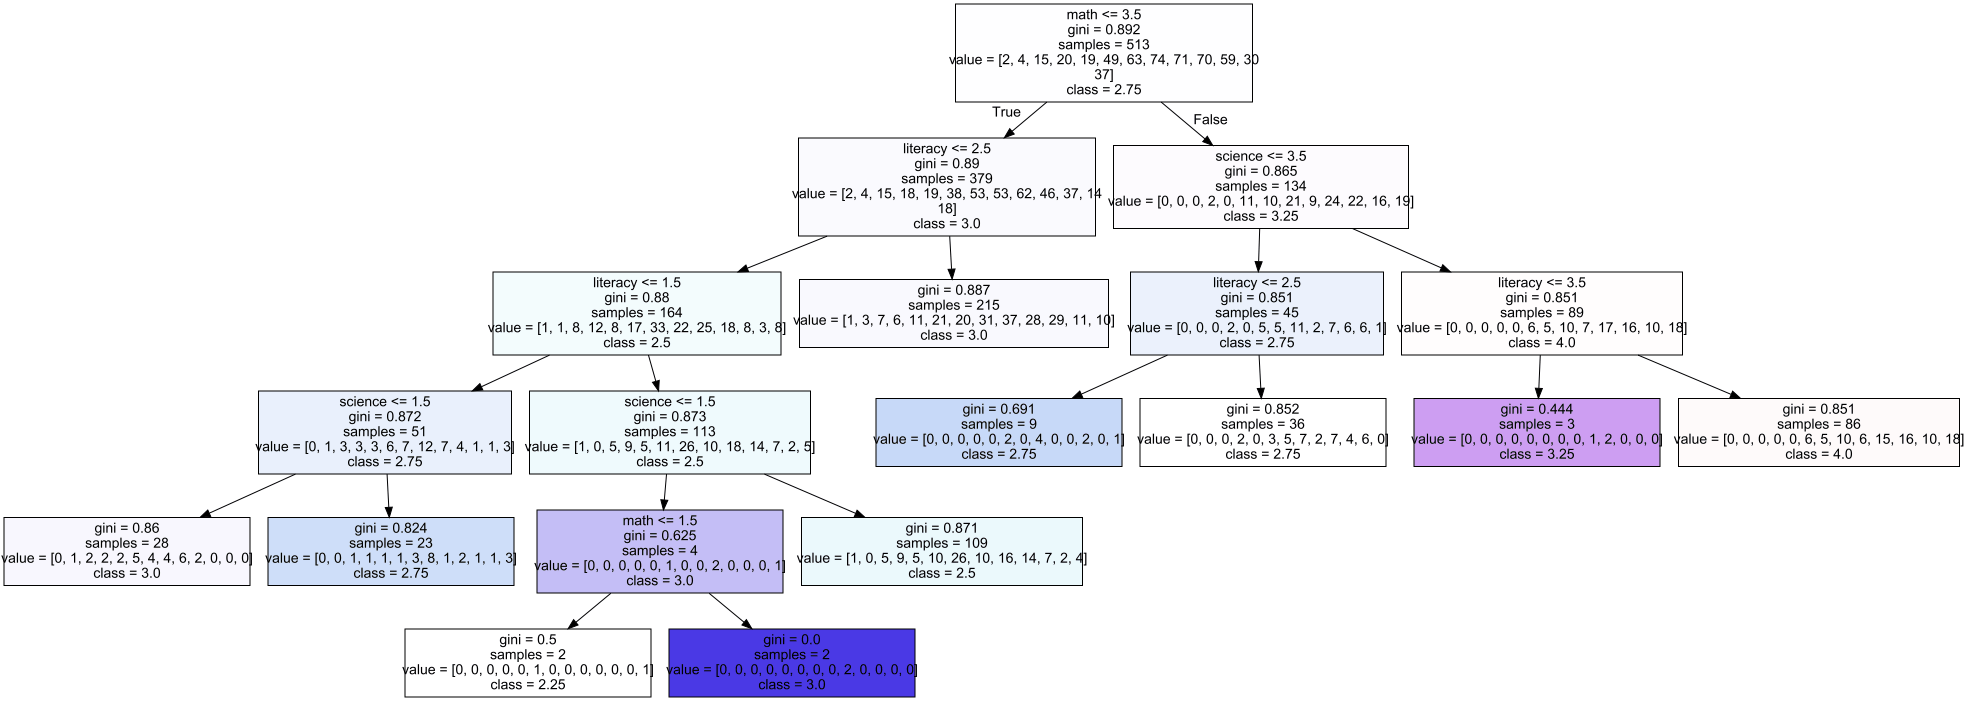

In [33]:
# edit this code

clf_changed = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, min_samples_split=3)
clf_changed.fit(X_train, y_train)

# Print parameters used
print("max_depth", clf_changed.max_depth)
print("max_leaf_nodes", clf_changed.max_leaf_nodes)
print("min_samples_leaf", clf_changed.min_samples_leaf)

# What is the accuracy on the training set? 
train_pred = clf_changed.predict(X_train)
train_acc = sum(train_pred==y_train.values)/train_pred.shape[0]
print("Training accuracy is", train_acc)

# What is the accuracy on the test set? 
test_pred = clf_changed.predict(X_test)
test_acc = sum(test_pred==y_test.values)/test_pred.shape[0]
print("Training accuracy is", test_acc)

# Display the generated tree
our_features = ['literacy','science','math']
our_classes = ['1.0', '1.25', '1.5', '1.75', '2.0', '2.25', '2.5', '2.75', '3.0','3.25', '3.5', '3.75', '4.0']
our_filename = "mytree_changed.png"
save_tree(clf_changed, out_file = our_filename, features = our_features, classes = our_classes)
i = Image(filename = our_filename)
i

Report the values and parameters you found below:

1)

2)

3)